#IA376N

Profa. Dra. Paula D. Paro Costa
Depto. de Eng. de Computação e Automação (DCA)
Faculdade de Engenharia Elétrica e de Computação (FEEC)
paulad@unicamp.br


#Nome dos integrantes da equipe:

*   Byron Alejandro Acuña Acurio. RA: 209428
*   José Carlos Ferreira. RA: 170860



#Projeto A1 : Proposta de Modelo de Síntese de Dado Tabular em Saúde

Esta atividade pode ser realizada individualmente ou em duplas (em caso de entrega em dupla, pede-se que apenas um dos membros da dupla realize a entrega e indique isso explicitamente no campo de comentários da entrega).
Atente-se ao horário de entrega da atividade!

O objetivo é que você proponha e gere um banco de dados sintéticos de resultados de exames de hemograma.
Não precisa ser uma abordagem baseada em deep learning, pode ser uma abordagem baseada em regras ou em modelos estatísticos clássicos.

Seguem anexadas três planilhas extraídas de uma base de resultados de exames de laboratório de análises clínicas.
São dados reais obtidos de um hemocentro do estado de São Paulo (e podem exigir etapas de limpeza de dados).
Campos de identificação foram transformads para fins de anonimização completa dos pacientes.

Proponha um método, implemente e apresente uma base de dados sintética com, no mínimo, 1000 resultados de exames fictícios.

Simplificação admitida: sintetizar apenas um dos parâmetros do hemograma.
Outras simplificações devem ser devidamente justificadas.
Deverá ser entregue um notebook Google Colab, explicitando e explicando sua implementação.

Responda à seguinte pergunta: como você garante que a sua síntese de dados é realista?
Explicite os critérios utilizados.

Sugere-se que o material suplementar anexo seja estudado, mas adianta-se que o mesmo não contêm a solução do problema.
Servem apenas como uma introdução a aspectos relevantes a serem considerados na síntese de sinais e um exemplo de abordagem na saúde.

#Resposta da Pergunta: Como você garante que a sua síntese de dados é realista?

A abordagem usada neste trabalho para garantir que os dados da síntese seja realista é mediante a comparação das estatísticas descriptivas dos dados originais, ou seja a meia, o desvio padrão, valores de quantils 25%, 50%, 75%, alem de fazer uma verificação visual das funções de probabilidade obtidas usando kernel density estimation e seus respectivos histogramas.

# Workflow

A metodologia de trabalho adotada e que está documentada nesse relatório consistiu das seguintes
etapas

1.   Analise exploratória de dados e pré processamento
2.   Definição de possíveis modelos para o problema
3.   Validação do modelo
4.   Conclusão e possíveis melhoras no modelo

# 1. Analise exploratória de dados e pré processamento

In [1]:
!git clone https://github.com/byronacunia/A1.git

Cloning into 'A1'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 2.61 MiB | 4.84 MiB/s, done.


# Librerias de python usadas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

A função "expand_hemogram_data" vai criar uma coluna para cada tipo de exame e colocará o valor numérico do exame de cada paciente respectivamente.

In [3]:
def expand_hemogram_data(df):
    # Inicializar novo DataFrame com ID de paciente exclusivo e data do exame
    expanded_df = df[['data do exame', 'idade', 'ID do paciente', 'sexo']].drop_duplicates().reset_index(drop=True)

    # Lista de nome das colunas para ser adicionadas baseado em diferentes tipos de exames
    exam_columns = df['tipo de exame'].unique()

    # Inicialização das colunas do tipo de examen com valores NaN
    for col in exam_columns:
        expanded_df[col] = np.nan

    # Preenchimento dos valores de cada tipo de examen
    for index, row in df.iterrows():
        patient_id = row['ID do paciente']
        exam_date = row['data do exame']
        exam_type = row['tipo de exame']
        exam_result = row['resultado do exame']

        # Verificação se existe uma coluna do tipo de examem com o resultado
        if exam_type not in exam_columns:
            continue

        # Retorna o index do paciente para preencher os dados do examem
        match_index = expanded_df[(expanded_df['ID do paciente'] == patient_id) & (expanded_df['data do exame'] == exam_date)].index

        # Preechimento do resultado do exame à coluna apropriada para cada índice correspondente encontrado anteriormente
        for idx in match_index:
            expanded_df.at[idx, exam_type] = exam_result

    return expanded_df

In [4]:
# A continuação se define os caminhos e os nomes das colunas dos dados crus
file_paths = ['./A1/data1.csv', './A1/data2.csv', './A1/data3.csv']
column_names = ['data do exame', 'idade', 'ID do paciente', 'sexo', 'tipo de exame', 'resultado do exame']

# A continuação se cria uma lista para armazenar os dataframes
dataframes = list()

# Percorremos os caminhos para fazer a leitura dos três arquivos csv de dados crus
for file_path in file_paths:
    data = pd.read_csv(file_path, names=column_names)

    # A continuação se faz um pre-procesamento para poder ter um dataframe com os valores numéricos
    data['data do exame'] = pd.to_datetime(data['data do exame'], errors='coerce')
    data['resultado do exame'] = data['resultado do exame'].str.strip()
    data['resultado do exame'] = data['resultado do exame'].str.replace(',', '.')
    data['resultado do exame'] = pd.to_numeric(data['resultado do exame'], errors='coerce')

    # Se faz a eliminação dos registros que tem valores nan
    data = data.dropna()

    # Armazenamos o dataframe na lista
    dataframes.append(expand_hemogram_data(data))

In [5]:
#Fazemos a concatenação dos três dataframes
combined_dataframe = pd.concat(dataframes)

In [6]:
#Se fez a visualização dos primeiros registros e dos ultimos registros
combined_dataframe

,data do exame,idade,ID do paciente,sexo,PLAQUETAS SANGUE,NEUTRÓFILOS ABSOLUTO,LINFÓCITOS ABSOLUTO,NEUTRÓFILOS %,LINFÓCITOS %,MCHC,EOSINÓFILOS ABSOLUTO,NEUTRÓFILOS SEGMENTADOS %,LINFOCITOS ATIPICOS TOTAL %,PLASMÓCITOS ABSOLUTO,PLASMÓCITOS%,LEUCÓCITOS TOTAIS,LUC ABSOLUTO,LUC %
0,2021-10-24 00:33:00,19,20850235,F,316.0,9.9006,1.1380,87.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-24 00:33:00,70,16084789,M,239.0,2.3423,1.1919,50.7,25.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-24 00:33:00,62,25926519,F,166.0,9.2064,0.9864,84.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-24 00:33:00,49,20209887,M,201.0,3.2026,2.7001,47.8,40.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-24 00:33:00,50,25722538,M,319.0,7.3983,3.6560,60.1,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23950,2021-10-23 22:14:00,74,24902634,M,595.0,14.5620,0.6472,90.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23951,2021-10-23 22:14:00,51,25881631,M,115.0,2.8662,1.0100,64.7,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23952,2021-10-23 22:14:00,18,25932729,M,307.0,12.8370,1.5015,77.8,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23953,2021-10-23 22:21:00,95,25932815,M,316.0,10.5425,0.2348,89.8,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Figura para visualizar a integridade dos dados crus

Na parte superior se pode visualizar a quantidade de registros diferente de nan em cada coluna, ao mesmo tempo que as barras permitem ter uma visualização dos dados faltantes, neste caso é os exámenes "PLAQUETAS SANGUE", "NEUTRÓFILOS ABSOLUTO", "LINFÓCITOS ABSOLUTO", "NEUTRÓFILOS %", "LINFÓCITOS %" são os que mais registros existem, por isso vamos usar eles para fazer a geração dos dados sintéticos.

<Axes: >

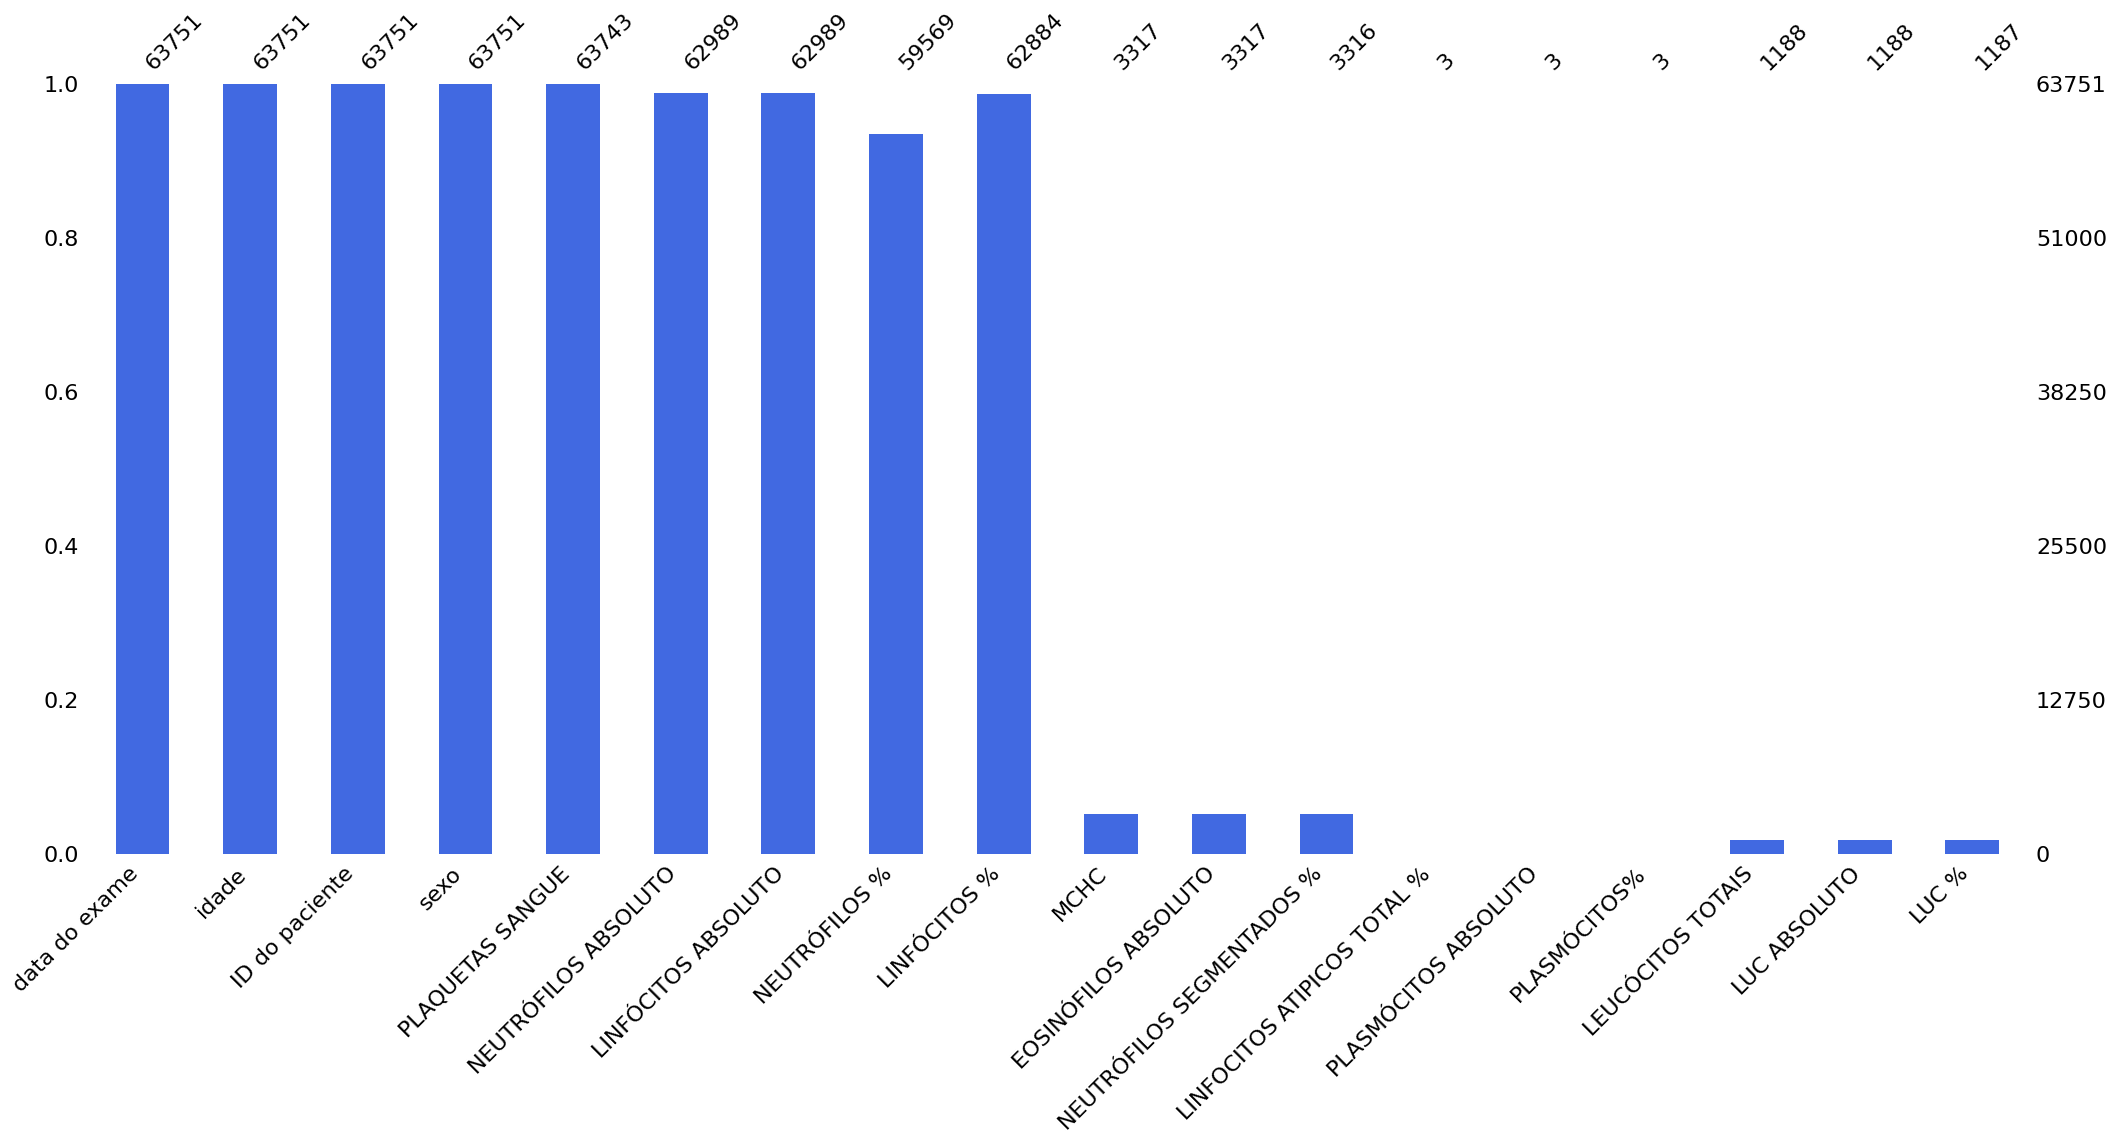

In [7]:
msno.bar(combined_dataframe, color="RoyalBlue")

In [8]:
#Baseados na figura de acima vamos a filtrar só os examens que mais registros tem.
columns_to_keep = ["idade", "sexo", "PLAQUETAS SANGUE", "NEUTRÓFILOS ABSOLUTO", "LINFÓCITOS ABSOLUTO", "NEUTRÓFILOS %", "LINFÓCITOS %"]

In [9]:
# Fazemos a filtragem dos examens baseados na lista "columns_to_keep"
filtered_df = combined_dataframe[columns_to_keep]
# Neste caso como temos uma variavel categorica, criamos duas columnas para cada género e fazemos one-hot-encoding
Dados_df = pd.get_dummies(filtered_df, columns=["sexo"], prefix="sexo")

In [10]:
#Contagem de registros com volores nan
Dados_df.isnull().sum()

,0
idade,0
PLAQUETAS SANGUE,8
NEUTRÓFILOS ABSOLUTO,762
LINFÓCITOS ABSOLUTO,762
NEUTRÓFILOS %,4182
LINFÓCITOS %,867
sexo_F,0
sexo_M,0


## Figura para visualizar a integridade do banco de dados crus filtrados por tipo de examen que mais registros possuem  

<Axes: >

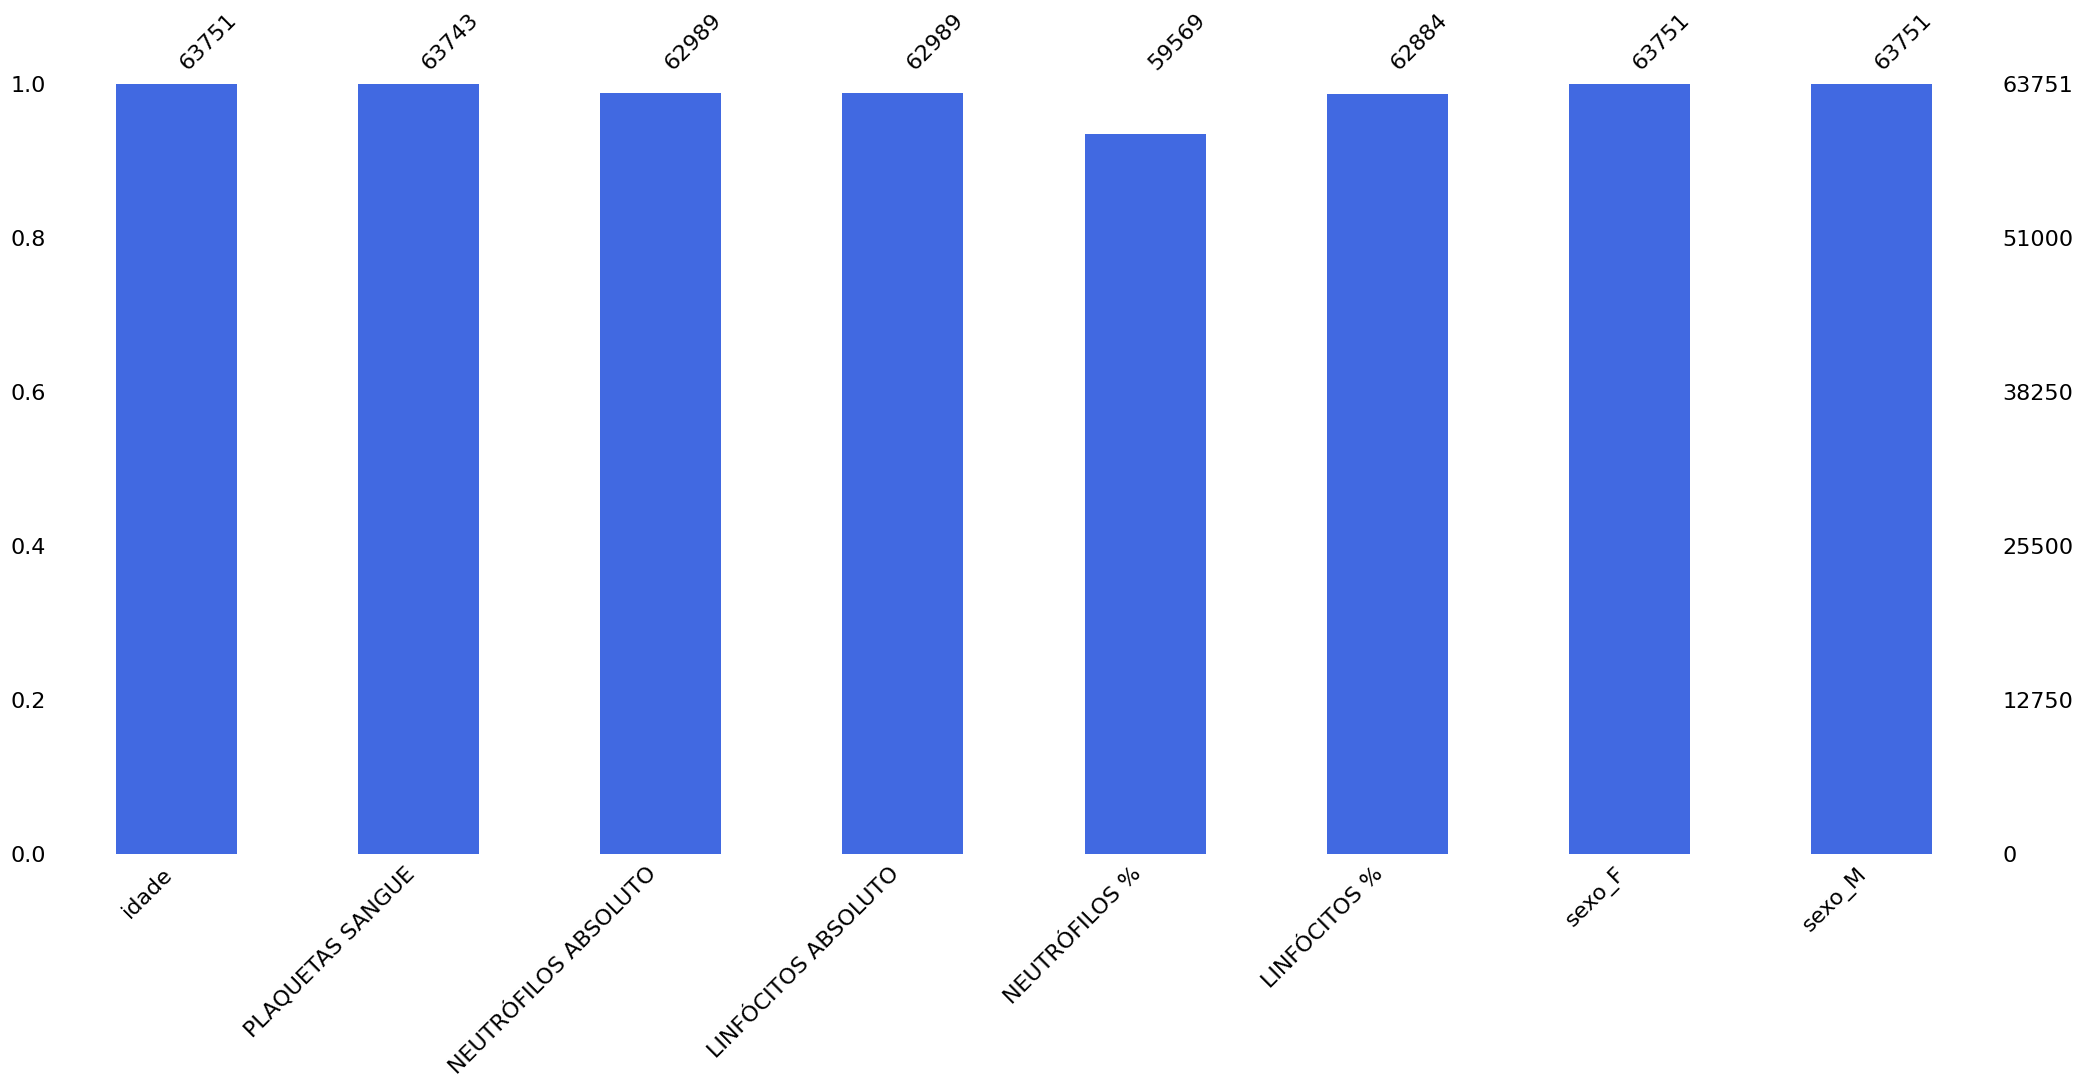

In [11]:
msno.bar(Dados_df, color="RoyalBlue") #para visualizar a integridade do datafram

## Figura para visualizar a integridade do banco de dados a ser usada na geração de dados sintéticos  

<Axes: >

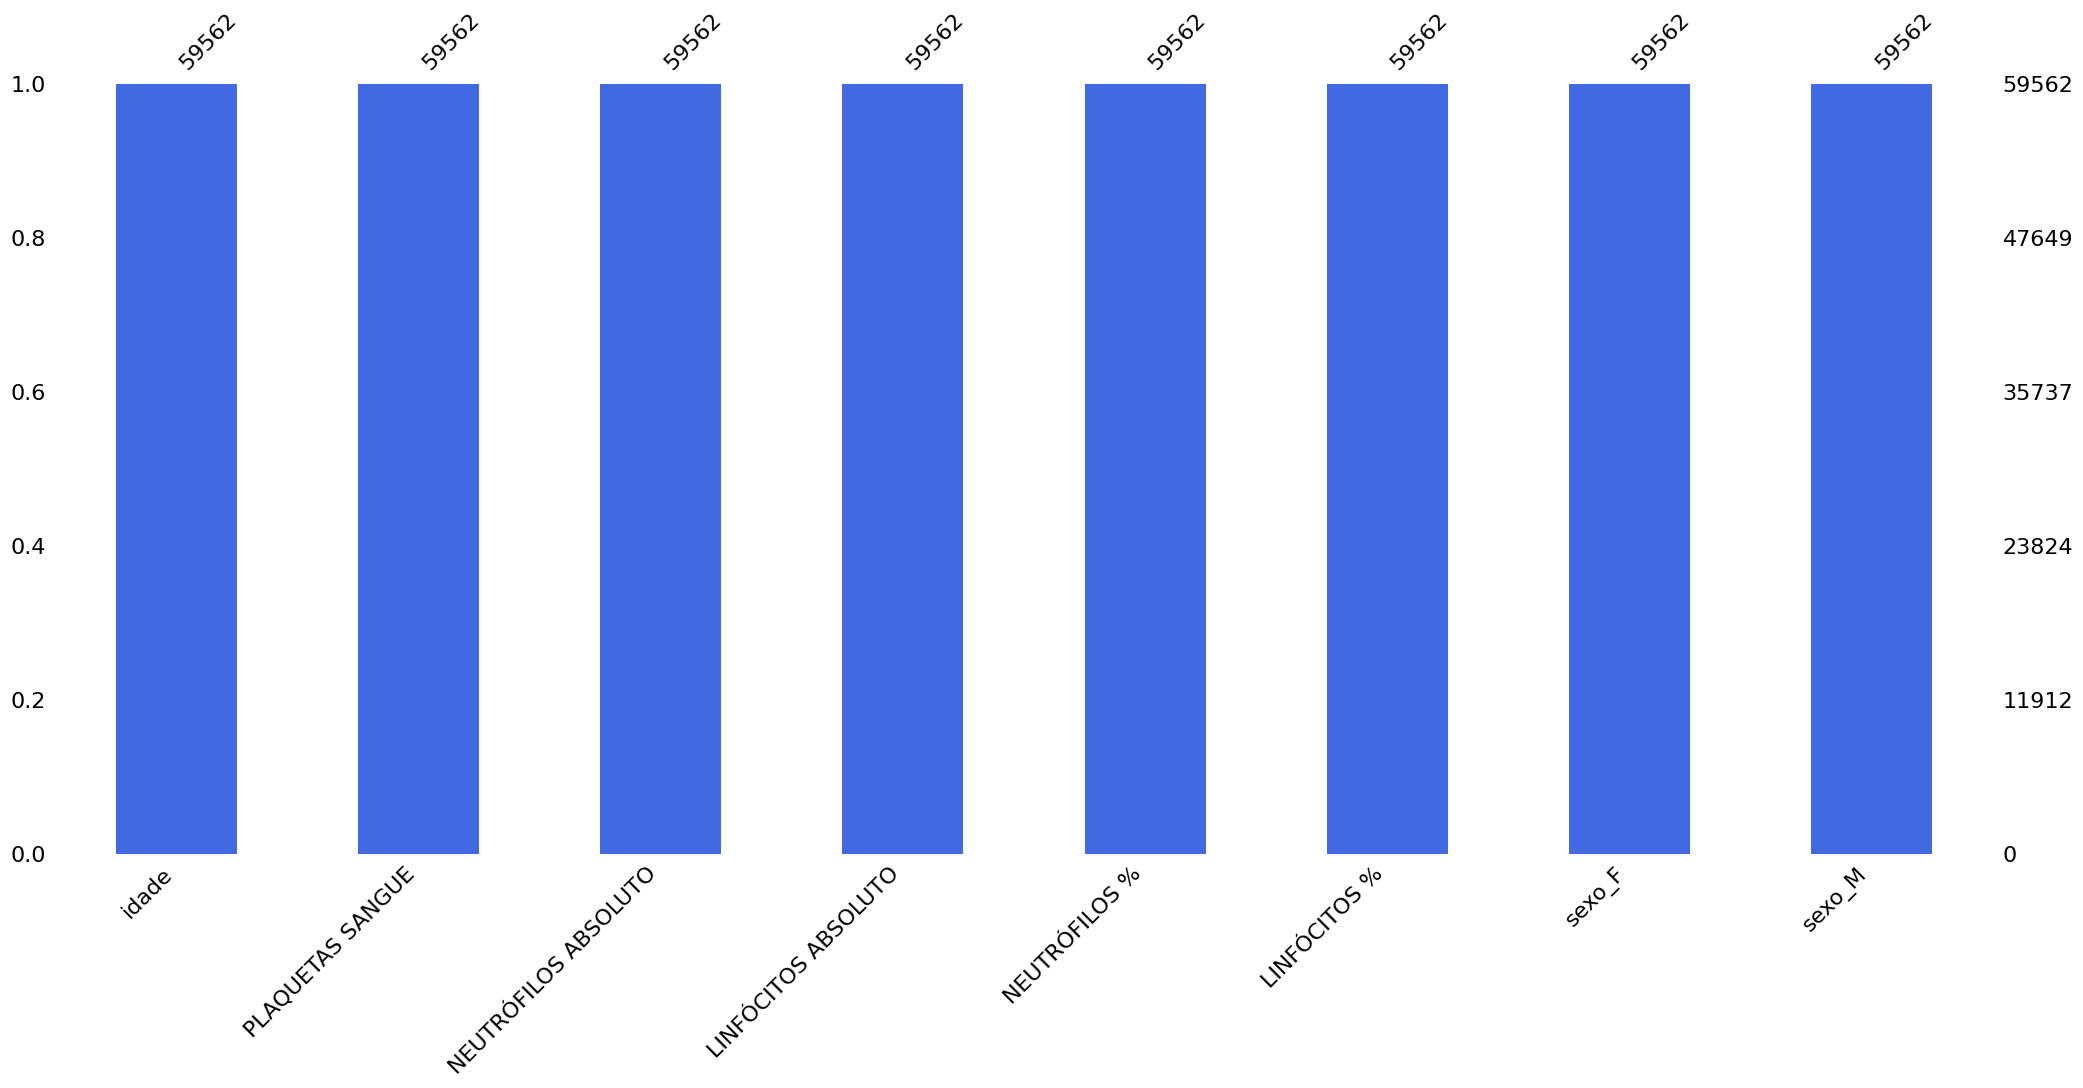

In [12]:
# Finalmente eliminamos os registros com nan
Dados_df = Dados_df.dropna()
msno.bar(Dados_df, color="RoyalBlue") #para visualizar a integridade do datafram

In [13]:
#Se fez a visualização dos primeiros registros e dos ultimos registros
Dados_df

,idade,PLAQUETAS SANGUE,NEUTRÓFILOS ABSOLUTO,LINFÓCITOS ABSOLUTO,NEUTRÓFILOS %,LINFÓCITOS %,sexo_F,sexo_M
0,19,316.0,9.9006,1.1380,87.0,10.0,True,False
1,70,239.0,2.3423,1.1919,50.7,25.8,False,True
2,62,166.0,9.2064,0.9864,84.0,9.0,True,False
3,49,201.0,3.2026,2.7001,47.8,40.3,False,True
4,50,319.0,7.3983,3.6560,60.1,29.7,False,True
...,...,...,...,...,...,...,...,...
23950,74,595.0,14.5620,0.6472,90.0,4.0,False,True
23951,51,115.0,2.8662,1.0100,64.7,22.8,False,True
23952,18,307.0,12.8370,1.5015,77.8,9.1,False,True
23953,95,316.0,10.5425,0.2348,89.8,2.0,False,True


## Histogramas para analisar a distribuição dos parâmetros do hemograma  

A continuação se fez uma plotagem do histograma e da função de probabilidade usando kernel density estimation, para analisar os parâmetros do hemograma

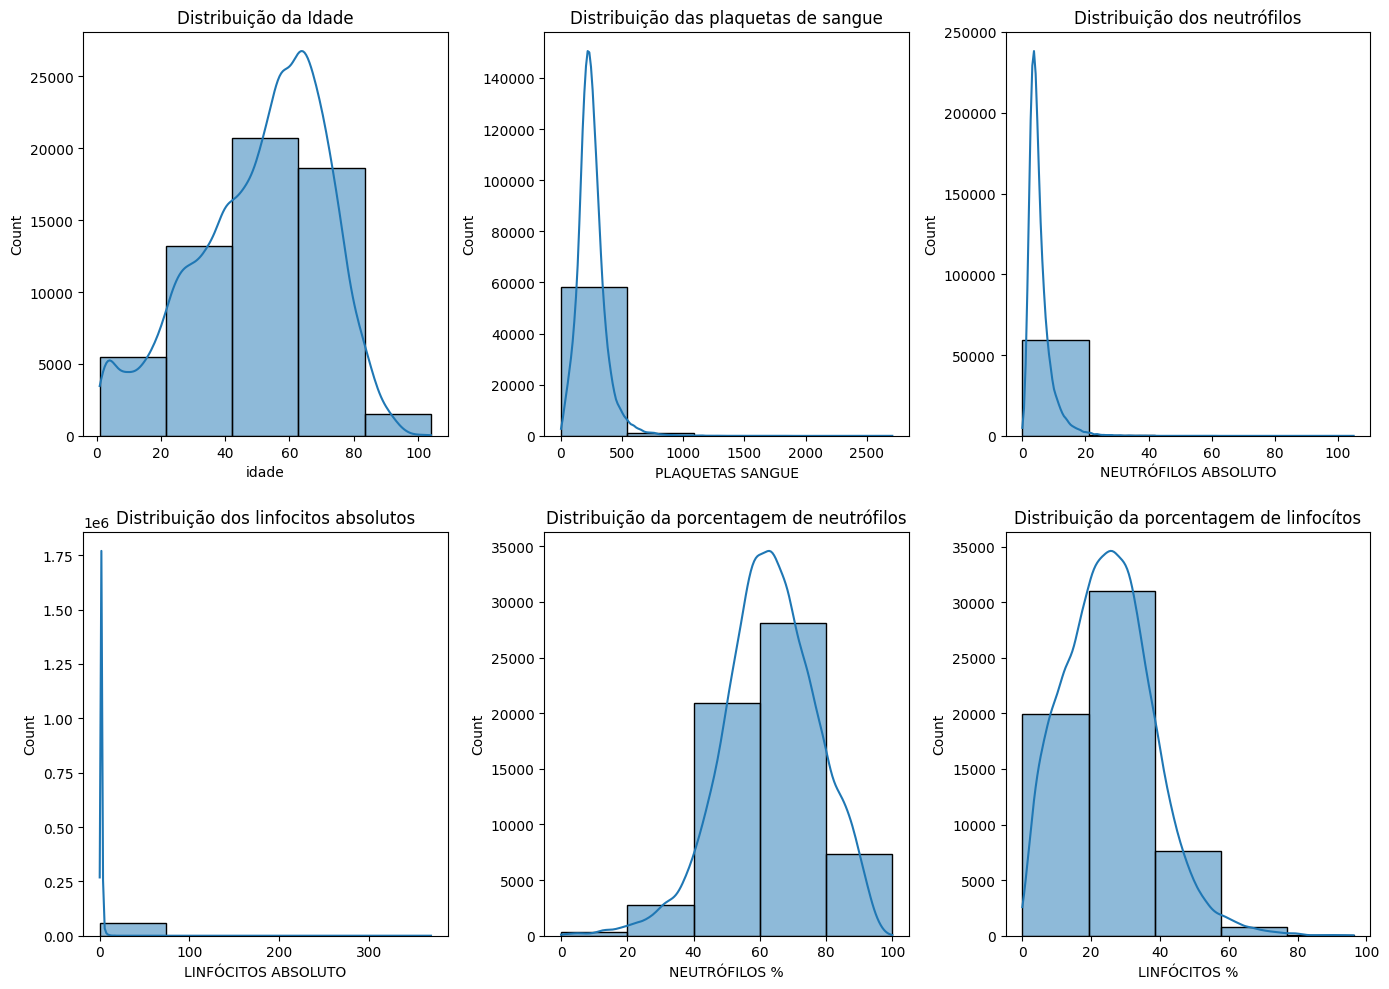

In [14]:
# Plotagem de histogramas para analisar a distribuição os parâmetros do hemograma
plt.figure(figsize=(14, 10))

# Distribuição da idade
plt.subplot(2, 3, 1)
sns.histplot(Dados_df['idade'], bins=5, kde=True)
plt.title('Distribuição da Idade')

# Distribuição das plaquetas de sangue
plt.subplot(2, 3, 2)
sns.histplot(Dados_df['PLAQUETAS SANGUE'], bins=5, kde=True)
plt.title('Distribuição das plaquetas de sangue')

# Distribuição dos neutrófilos
plt.subplot(2, 3, 3)
sns.histplot(Dados_df['NEUTRÓFILOS ABSOLUTO'], bins=5, kde=True)
plt.title('Distribuição dos neutrófilos')

# Distribuição de linfocitos absolutos
plt.subplot(2, 3, 4)
sns.histplot(Dados_df['LINFÓCITOS ABSOLUTO'], bins=5, kde=True)
plt.title('Distribuição dos linfocitos absolutos')

# Distribuição da porcentagem de neutrófilos
plt.subplot(2, 3, 5)
sns.histplot(Dados_df['NEUTRÓFILOS %'], bins=5, kde=True)
plt.title('Distribuição da porcentagem de neutrófilos')

# Distribuição da porcentagem de linfocítos
plt.subplot(2, 3, 6)
sns.histplot(Dados_df['LINFÓCITOS %'], bins=5, kde=True)
plt.title('Distribuição da porcentagem de linfocítos')

plt.tight_layout()
plt.show()


## Matriz de Covariancia para analisar a distribuição os parâmetros do hemograma
Se pode visualizar que na matriz de covariância que os parâmetros do hemograma não faz diferencia pelo gênero do paciente, por outro lado se pode encontrar que os examenes "NEUTRÓFILOS ABSOLUTO", "LINFÓCITOS ABSOLUTO", "NEUTRÓFILOS %", "LINFÓCITOS %" apresentam algumas correlações que podem ser interesantes.

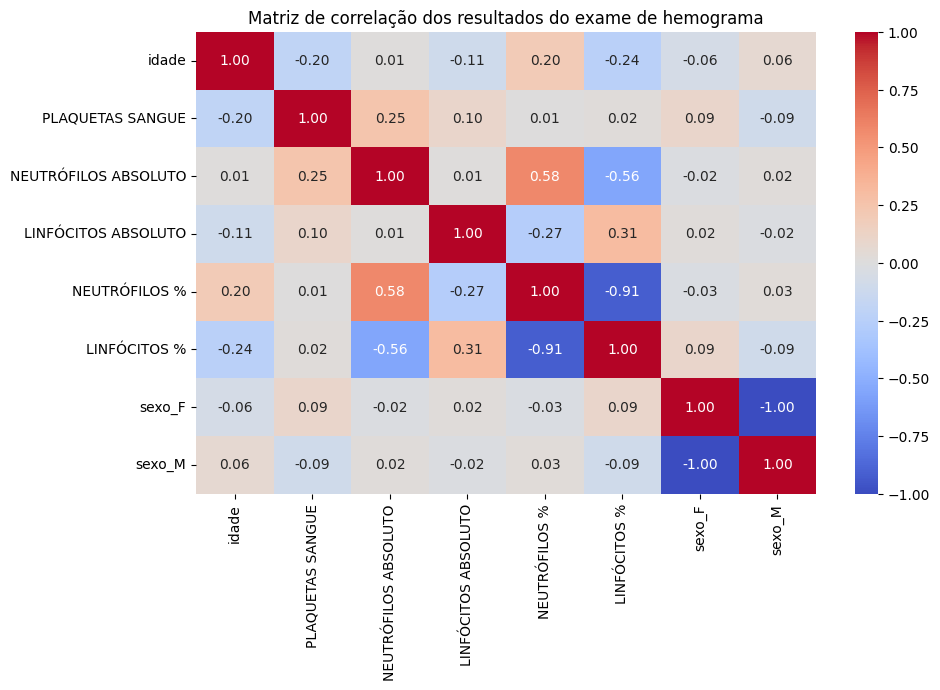

In [15]:
from scipy.stats import multivariate_normal
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler().fit(Dados_df)
Dados_df_standarized_df = pd.DataFrame(scaler.transform(Dados_df), columns=Dados_df.columns)
# Obtenção da matriz de correlação
correlation_matrix = Dados_df_standarized_df.corr()

# Plotagem da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação dos resultados do exame de hemograma')
plt.show()

#2. Definição de possíveis modelos para o problema

## 2.1 Método estatístico baseado em uma distribuição normal gaussiana multivariada

Assume-se que os dados seguem uma distribuição normal gaussiana.

$$f(x)=\frac{1}{\sqrt{(2 \pi)^d \operatorname{det}(\Sigma)}} \exp \left(-\frac{1}{2}(x-\mu)^T \Sigma^{-1}(x-\mu)\right)$$

onde, $\mu \in \mathbb{R}^d, d=8$, neste caso $d$ é o número de colunas, e sua matriz de covariancia é $\Sigma \in \mathbb{R}^{d \times d}$

$x^s \sim \mathcal{N}(\mu, \Sigma)$

In [16]:
from scipy.stats import multivariate_normal
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=10, random_state=0).fit(Dados_df)
Dados_df_standarized_df = pd.DataFrame(scaler.transform(Dados_df), columns=Dados_df.columns)
# A continuçao fazemos o calculo da matriz de covariancias e o vetor de meias.
means = Dados_df_standarized_df.mean()
cov_matrix = Dados_df_standarized_df.cov()
# Step 2: Geramos aleatoriamente dados de essa distribuição multivariada
synthetic_numerical_data = multivariate_normal.rvs(mean=means, cov=cov_matrix, size=Dados_df.shape[0])
synthetic_numerical_data = scaler.inverse_transform(synthetic_numerical_data)
synthetic_numerical_df = pd.DataFrame(synthetic_numerical_data, columns=Dados_df.columns)
# As variaveis idedade e gênero são convertidas para os valores inteiro e tipo bool
synthetic_numerical_df['idade'] = synthetic_numerical_df['idade'].round().astype(int)
synthetic_numerical_df['sexo_F'] = synthetic_numerical_df['sexo_F'].round().astype(bool)
synthetic_numerical_df['sexo_M'] = synthetic_numerical_df['sexo_M'].round().astype(bool)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [17]:
def plot_data_distribution(Dados_df, synthetic_numerical_df, real_label='Real Data', synthetic_label='Synthetic Data'):
    """
    Função para fazer a plotagem de histogramas para analisar as distribuições dos dados reais e sintéticos.

    Parâmetros:
    Dados_df: DataFrame de dados real.
    synthetic_numerical_df: DataFrame de dados sintéticos.
    real_label (str): Rótulo para os dados reais nos gráficos.
    synthetic_label (str): Rótulo para os dados sintéticos nos gráficos.
    """

    # Tamanho da figura
    plt.figure(figsize=(14, 10))

    # Distribuição da Idade
    plt.subplot(2, 3, 1)
    sns.histplot(Dados_df['idade'], bins=10, kde=True, color='blue', label=real_label)
    sns.histplot(synthetic_numerical_df['idade'], bins=10, kde=True, color='red', label=synthetic_label, alpha=0.5)
    plt.title('Distribuição da Idade')
    plt.legend()

    # Distribuição das plaquetas de sangue
    plt.subplot(2, 3, 2)
    sns.histplot(Dados_df['PLAQUETAS SANGUE'], bins=10, kde=True, color='blue', label=real_label)
    sns.histplot(synthetic_numerical_df['PLAQUETAS SANGUE'], bins=10, kde=True, color='red', label=synthetic_label, alpha=0.5)
    plt.title('Distribuição das plaquetas de sangue')
    plt.legend()

    # Distribuição dos neutrófilos
    plt.subplot(2, 3, 3)
    sns.histplot(Dados_df['NEUTRÓFILOS ABSOLUTO'], bins=10, kde=True, color='blue', label=real_label)
    sns.histplot(synthetic_numerical_df['NEUTRÓFILOS ABSOLUTO'], bins=10, kde=True, color='red', label=synthetic_label, alpha=0.5)
    plt.title('Distribuição dos neutrófilos')
    plt.legend()

    # Distribuição dos linfocitos absolutos
    plt.subplot(2, 3, 4)
    sns.histplot(Dados_df['LINFÓCITOS ABSOLUTO'], bins=10, kde=True, color='blue', label=real_label)
    sns.histplot(synthetic_numerical_df['LINFÓCITOS ABSOLUTO'], bins=10, kde=True, color='red', label=synthetic_label, alpha=0.5)
    plt.title('Distribuição dos linfocitos absolutos')
    plt.legend()

    # Distribuição da porcentagem de neutrófilos
    plt.subplot(2, 3, 5)
    sns.histplot(Dados_df['NEUTRÓFILOS %'], bins=10, kde=True, color='blue', label=real_label)
    sns.histplot(synthetic_numerical_df['NEUTRÓFILOS %'], bins=10, kde=True, color='red', label=synthetic_label, alpha=0.5)
    plt.title('Distribuição da porcentagem de neutrófilos')
    plt.legend()

    # Distribuição da porcentagem de linfocítos
    plt.subplot(2, 3, 6)
    sns.histplot(Dados_df['LINFÓCITOS %'], bins=10, kde=True, color='blue', label=real_label)
    sns.histplot(synthetic_numerical_df['LINFÓCITOS %'], bins=10, kde=True, color='red', label=synthetic_label, alpha=0.5)
    plt.title('Distribuição da porcentagem de linfocítos')
    plt.legend()

    # Ajustar layout
    plt.tight_layout()

    # Apresentar Figura
    plt.show()

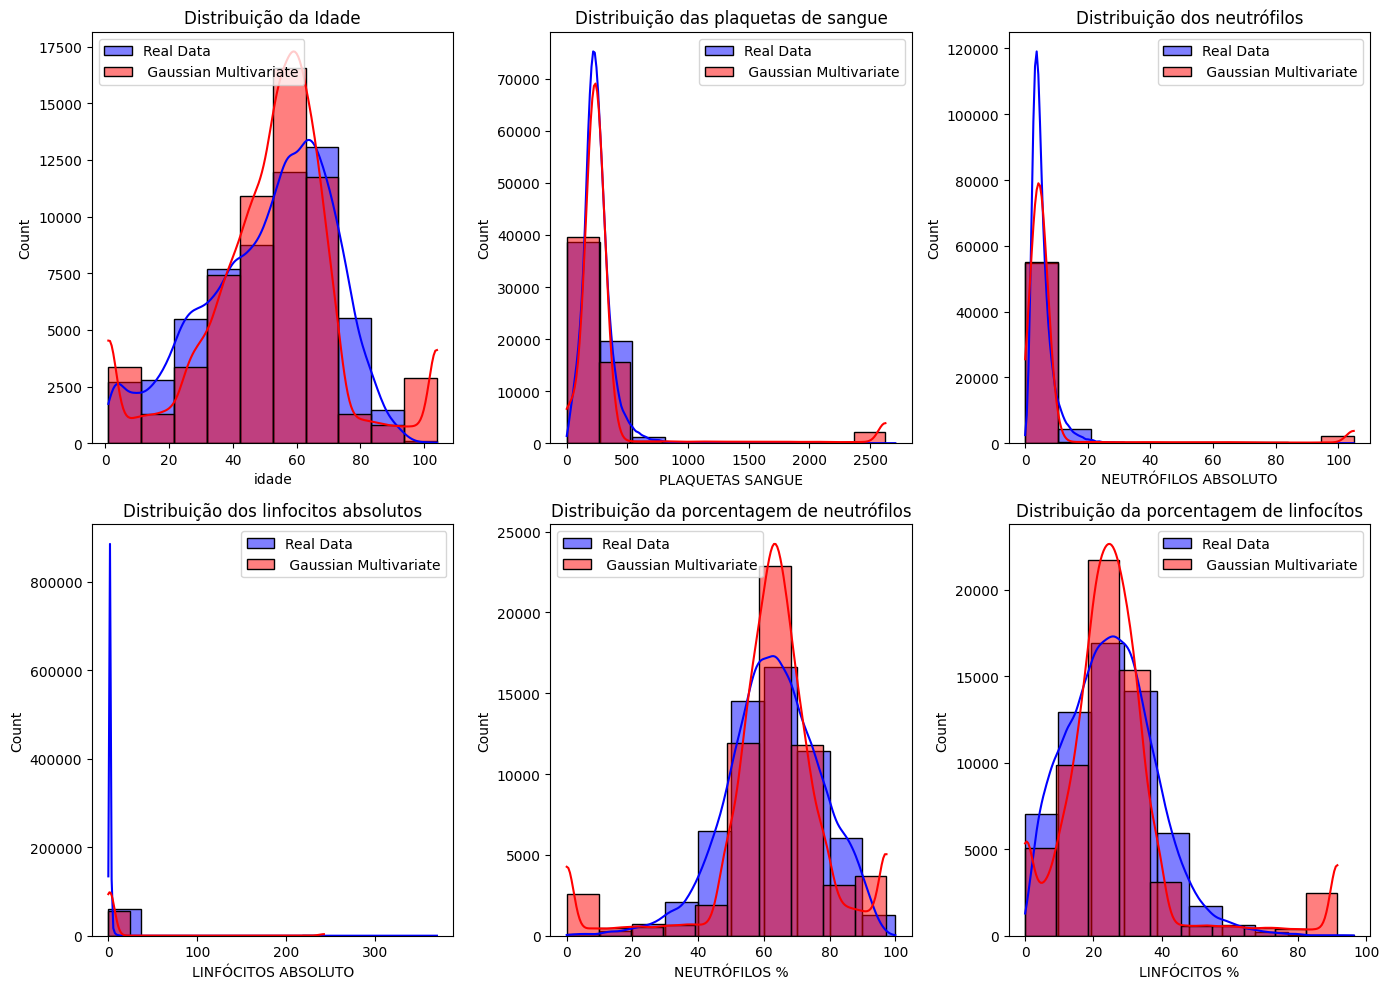

In [18]:
plot_data_distribution(Dados_df, synthetic_numerical_df, 'Real Data', ' Gaussian Multivariate')

A continuação se apresentam algumas estatísticas descriptivas para poder visualizar que os dados gerados possuem as mesmas características estatísticas que os dados originais.

In [19]:
synthetic_numerical_df.describe()

,idade,PLAQUETAS SANGUE,NEUTRÓFILOS ABSOLUTO,LINFÓCITOS ABSOLUTO,NEUTRÓFILOS %,LINFÓCITOS %
count,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000
mean,52.512894,353.281601,9.833295,13.736652,61.913015,26.960863
std,21.080618,509.194813,21.145032,48.616389,18.333396,17.693972
min,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000
25%,42.000000,196.251655,3.451773,1.279096,56.661856,18.258786
50%,55.000000,236.386593,4.433186,1.724875,63.363810,24.704806
75%,64.000000,281.112162,5.804329,2.171983,70.258171,31.149290
max,104.000000,2626.000000,104.919000,242.244000,97.300000,91.500000


In [20]:
Dados_df.describe()

,idade,PLAQUETAS SANGUE,NEUTRÓFILOS ABSOLUTO,LINFÓCITOS ABSOLUTO,NEUTRÓFILOS %,LINFÓCITOS %
count,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000
mean,51.265135,251.517855,5.434319,1.936740,63.085056,25.334166
std,20.152421,116.906559,3.902032,3.221414,14.313352,12.903536
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,182.000000,3.143825,1.147750,54.200000,16.000000
50%,55.000000,237.000000,4.449300,1.730400,63.200000,24.900000
75%,66.000000,301.000000,6.511950,2.367975,72.900000,33.500000
max,104.000000,2708.000000,104.919000,369.244800,100.000000,96.300000


## 2.2 Método estatístico baseadono modelo de mistura gaussiana

Aqui primeiro se fez a busca do hiperparâmetro número de componentes, mediante as métricas AIC e BIC

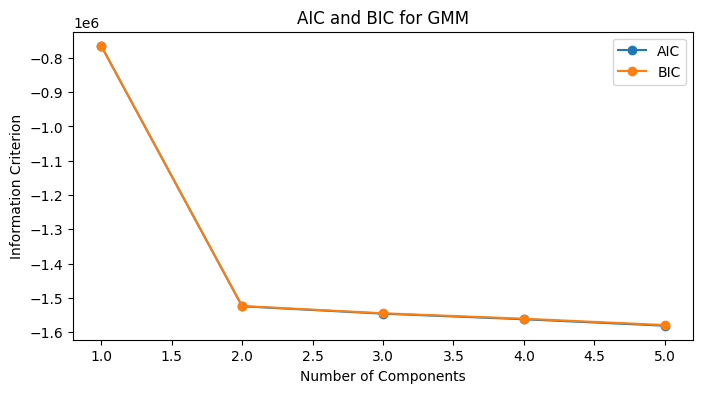

In [21]:
from sklearn.mixture import GaussianMixture
aic_values = []
bic_values = []
n_components_range = range(1, 6)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(Dados_df_standarized_df)
    aic_values.append(gmm.aic(Dados_df_standarized_df))
    bic_values.append(gmm.bic(Dados_df_standarized_df))

# Plotting AIC and BIC
plt.figure(figsize=(8, 4))
plt.plot(n_components_range, aic_values, marker='o', label='AIC')
plt.plot(n_components_range, bic_values, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for GMM')
plt.legend()
plt.show()

In [22]:
# Fitting Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(Dados_df_standarized_df)
# Generating synthetic data
synthetic_numerical_data, _ = gmm.sample(n_samples=Dados_df.shape[0])
synthetic_data = scaler.inverse_transform(synthetic_numerical_data)
synthetic_numerical_df = pd.DataFrame(synthetic_data, columns=Dados_df.columns)
# Converting age to integer values since age is discrete
synthetic_numerical_df['idade'] = synthetic_numerical_df['idade'].round().astype(int)
synthetic_numerical_df['sexo_F'] = synthetic_numerical_df['sexo_F'].round().astype(bool)
synthetic_numerical_df['sexo_M'] = synthetic_numerical_df['sexo_M'].round().astype(bool)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


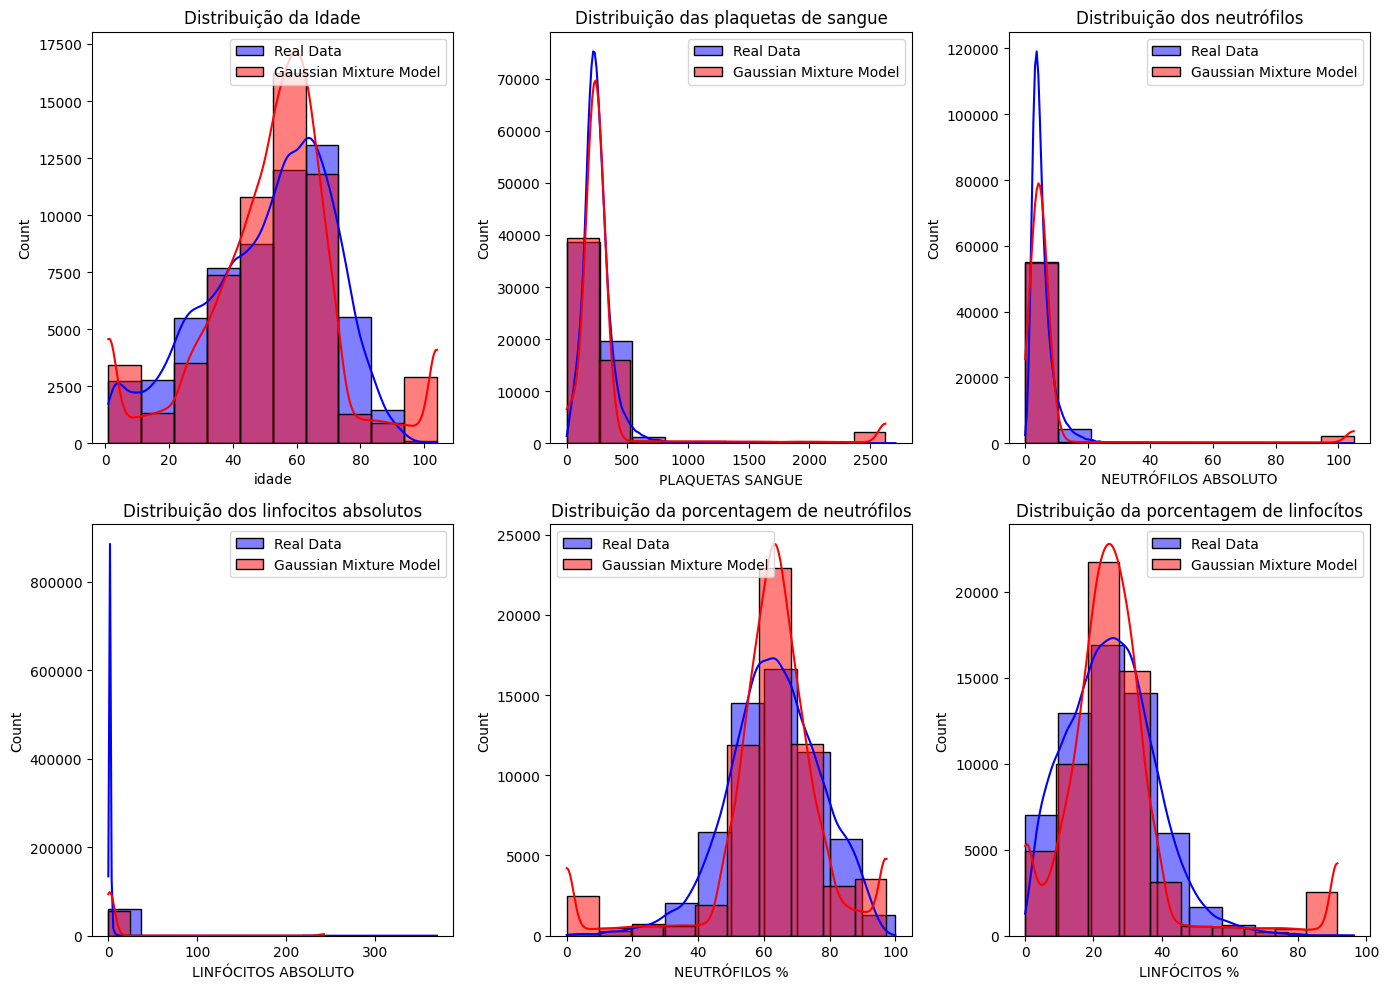

In [23]:
plot_data_distribution(Dados_df, synthetic_numerical_df, 'Real Data', 'Gaussian Mixture Model')

A continuação se apresentam algumas estatísticas descriptivas para poder visualizar que os dados gerados possuem as mesmas características estatísticas que os dados originais.

In [24]:
Dados_df.describe()

,idade,PLAQUETAS SANGUE,NEUTRÓFILOS ABSOLUTO,LINFÓCITOS ABSOLUTO,NEUTRÓFILOS %,LINFÓCITOS %
count,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000
mean,51.265135,251.517855,5.434319,1.936740,63.085056,25.334166
std,20.152421,116.906559,3.902032,3.221414,14.313352,12.903536
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,182.000000,3.143825,1.147750,54.200000,16.000000
50%,55.000000,237.000000,4.449300,1.730400,63.200000,24.900000
75%,66.000000,301.000000,6.511950,2.367975,72.900000,33.500000
max,104.000000,2708.000000,104.919000,369.244800,100.000000,96.300000


In [25]:
synthetic_numerical_df.describe()

,idade,PLAQUETAS SANGUE,NEUTRÓFILOS ABSOLUTO,LINFÓCITOS ABSOLUTO,NEUTRÓFILOS %,LINFÓCITOS %
count,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000
mean,52.429217,352.593291,9.851540,13.695287,61.888934,27.055989
std,21.265170,503.215410,21.124984,48.534242,18.161866,17.809353
min,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000
25%,42.000000,197.352479,3.446061,1.281523,56.712829,18.293851
50%,55.000000,237.173802,4.435249,1.725300,63.355705,24.736046
75%,64.000000,282.069268,5.807498,2.173626,70.242101,31.141532
max,104.000000,2626.000000,104.919000,242.244000,97.300000,91.500000


## 2.3 Método baseado em uma GAN

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

# Normalizamos as características usando minmax
scaler = MinMaxScaler()
Dados_min_max_df = scaler.fit_transform(Dados_df)

In [33]:
# Código usado para verificar a disponibilidade da GPU no colab
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [34]:
device

device(type='cuda')

In [35]:
# Definição do geador
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            nn.Sigmoid()
        )
    def forward(self, x):
      return self.model(x)

In [36]:
# Definição do discriminante
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
      return self.model(x)

In [43]:
# Hyperparametros usados
input_dim = 8  # Tamanho do vetor de entrada
output_dim = Dados_min_max_df.shape[1]  # Tamanho do vetor de saída
lr = 0.0002 #Taixa de aprendizado
epochs = 10000 #Número de épocas
batch_size = Dados_min_max_df.shape[0]  # Tamanho da batelada
# Inicialização da GPU
generator = Generator(input_dim, output_dim).to(device)
discriminator = Discriminator(output_dim).to(device)

# Otimizador
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Função de perda
criterion = nn.BCELoss()

In [44]:
# Lazo de treino
for epoch in range(epochs):
    # Amostragem aleatório dos dados originais
    real_data = torch.FloatTensor(Dados_min_max_df).to(device)
    noise = torch.randn(batch_size, input_dim).to(device)

    # Geração de dados
    fake_data = generator(noise)

    # Etiquetas
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    # Perda do discriminante
    outputs = discriminator(real_data)
    d_loss_real = criterion(outputs, real_labels)

    # Discriminator loss on fake data
    outputs = discriminator(fake_data)
    d_loss_fake = criterion(outputs, fake_labels)

    # Total discriminator loss
    d_loss = d_loss_real + d_loss_fake

    # Backpropagation do discriminante
    optimizer_D.zero_grad()
    d_loss.backward()
    optimizer_D.step()

    # Train Gerador
    noise = torch.randn(batch_size, input_dim).to(device)
    fake_data = generator(noise)

    # Gerador Perda (Enganhar o discriminante)
    outputs = discriminator(fake_data)
    g_loss = criterion(outputs, real_labels)

    # Backpropagation do gerador
    optimizer_G.zero_grad()
    g_loss.backward()
    optimizer_G.step()

    # Print das perdas
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

print("Training finished!")


Epoch [1000/10000] | D Loss: 0.4246 | G Loss: 1.8046
Epoch [2000/10000] | D Loss: 0.9339 | G Loss: 1.1299
Epoch [3000/10000] | D Loss: 1.1381 | G Loss: 1.0146
Epoch [4000/10000] | D Loss: 0.9850 | G Loss: 1.0809
Epoch [5000/10000] | D Loss: 0.8344 | G Loss: 1.2790
Epoch [6000/10000] | D Loss: 0.9227 | G Loss: 1.1363
Epoch [7000/10000] | D Loss: 0.9751 | G Loss: 1.0741
Epoch [8000/10000] | D Loss: 0.8995 | G Loss: 1.1487
Epoch [9000/10000] | D Loss: 0.7521 | G Loss: 1.2264
Epoch [10000/10000] | D Loss: 0.9419 | G Loss: 1.1351
Training finished!


In [46]:
# Geração de dados usando a GAN treinada
noise = torch.randn(batch_size, input_dim).to(device)
synthetic_data = generator(noise).detach().cpu().numpy()

# Voltamos as variaveis para à escala original
synthetic_df = pd.DataFrame(synthetic_data, columns=Dados_df.columns)

In [47]:
synthetic_numerical_df = scaler.inverse_transform(synthetic_df)

In [49]:
synthetic_numerical_df = pd.DataFrame(synthetic_numerical_df, columns=Dados_df.columns)

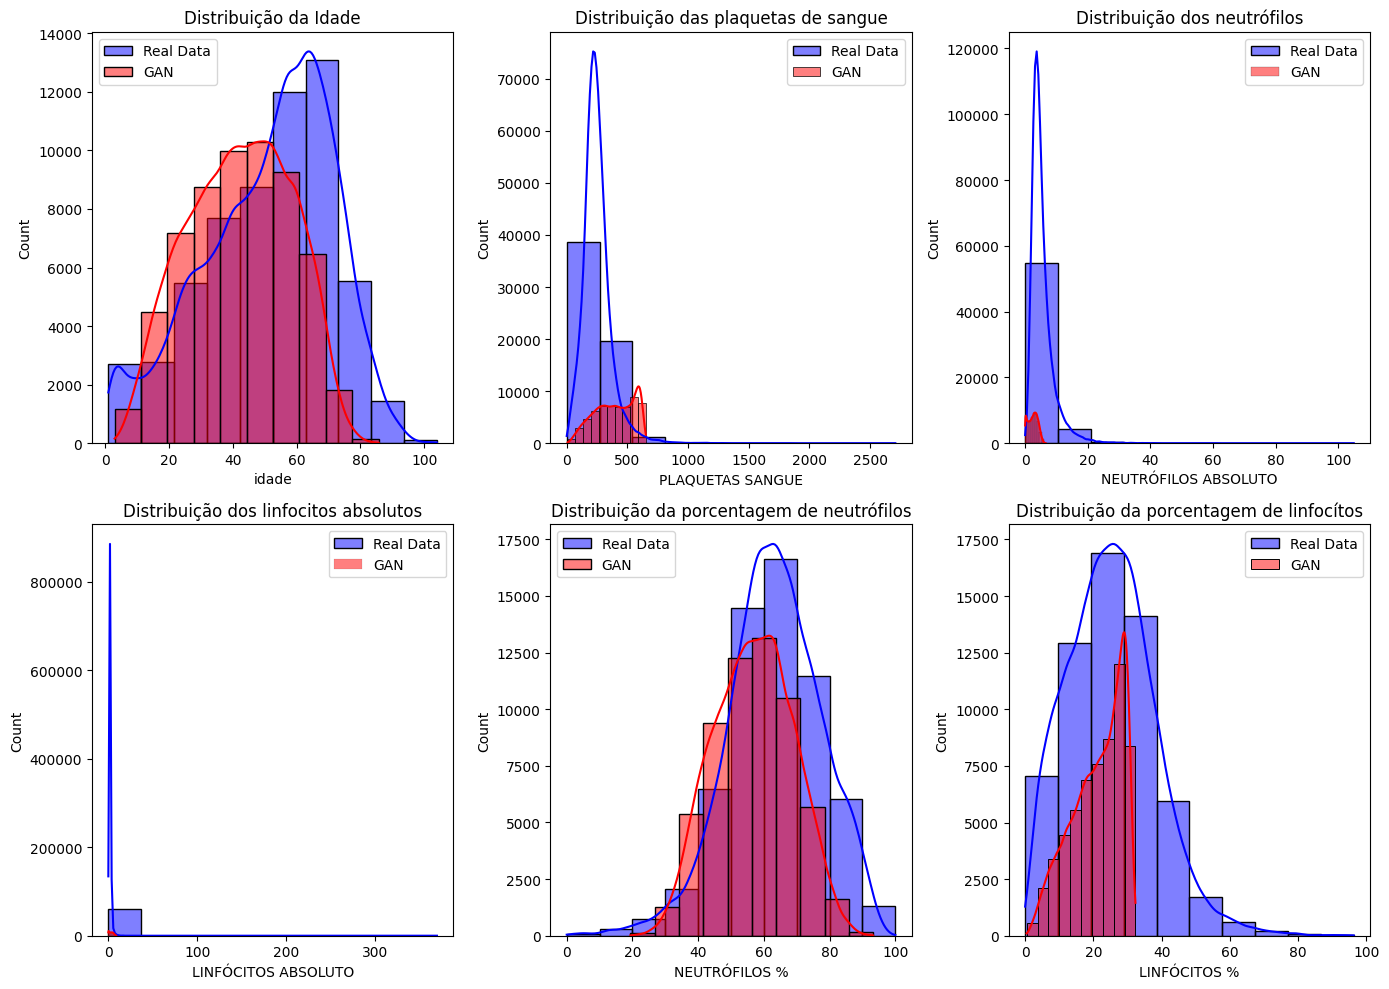

In [51]:
plot_data_distribution(Dados_df, synthetic_numerical_df, 'Real Data', 'GAN')

In [52]:
Dados_df.describe()

,idade,PLAQUETAS SANGUE,NEUTRÓFILOS ABSOLUTO,LINFÓCITOS ABSOLUTO,NEUTRÓFILOS %,LINFÓCITOS %
count,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000
mean,51.265135,251.517855,5.434319,1.936740,63.085056,25.334166
std,20.152421,116.906559,3.902032,3.221414,14.313352,12.903536
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,182.000000,3.143825,1.147750,54.200000,16.000000
50%,55.000000,237.000000,4.449300,1.730400,63.200000,24.900000
75%,66.000000,301.000000,6.511950,2.367975,72.900000,33.500000
max,104.000000,2708.000000,104.919000,369.244800,100.000000,96.300000


In [53]:
synthetic_numerical_df.describe()

,idade,PLAQUETAS SANGUE,NEUTRÓFILOS ABSOLUTO,LINFÓCITOS ABSOLUTO,NEUTRÓFILOS %,LINFÓCITOS %,sexo_F,sexo_M
count,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,5.956200e+04
mean,42.312092,393.562714,2.514883,3.162570,56.868500,21.110586,0.999632,2.956121e-04
std,16.131607,158.918335,1.472751,2.099607,11.978699,7.405429,0.000311,2.397149e-04
min,2.970224,8.582625,0.000317,0.000033,19.397039,0.468340,0.998454,3.450759e-11
25%,29.878667,267.428200,1.267052,1.299916,48.059270,15.800901,0.999424,7.430261e-05
50%,42.896376,401.883331,2.604304,3.078105,57.108366,22.465795,0.999690,2.618790e-04
75%,54.971219,539.482849,3.662669,4.830294,65.537176,27.565892,0.999910,4.702208e-04
max,85.731483,653.102844,6.553103,8.809420,93.242760,32.338539,1.000000,1.115314e-03


## 2.4 Método estatístico baseadono em kernel density estimation

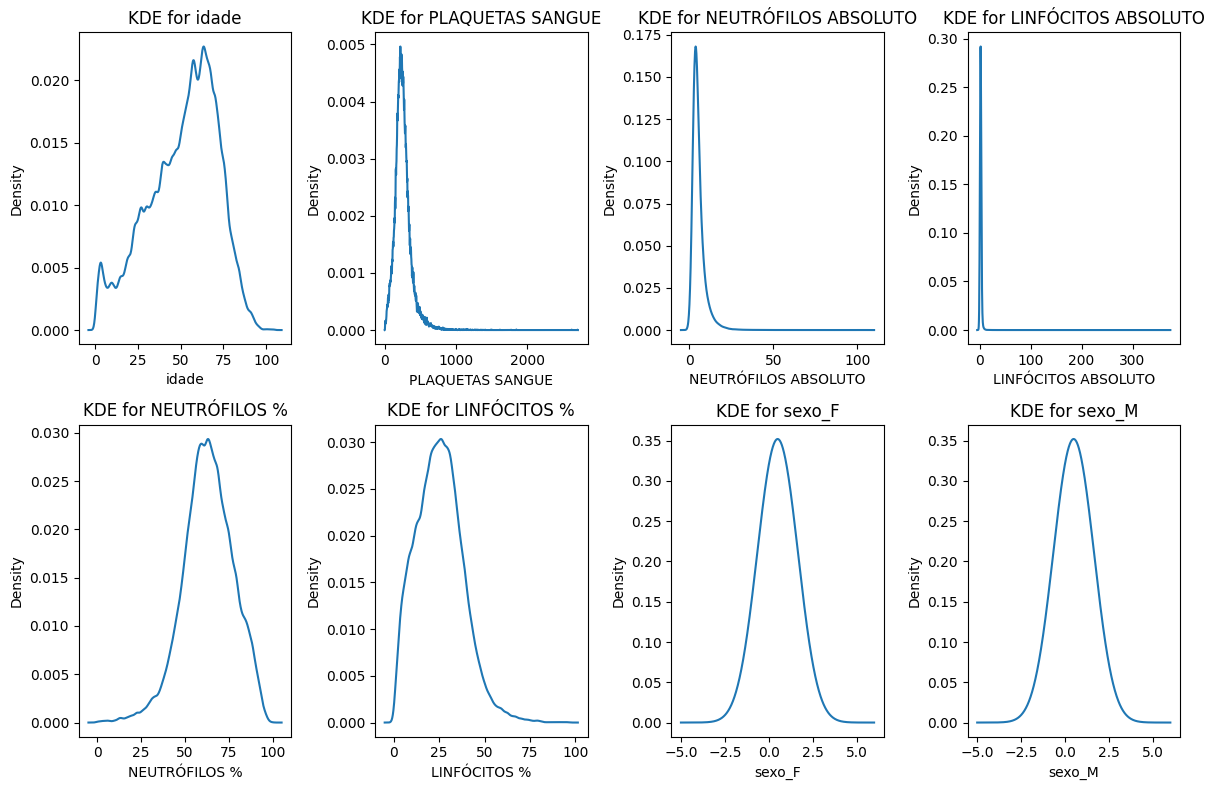

In [26]:
from sklearn.neighbors import KernelDensity
# Fazemos Kernel Density Estimation para cada coluna
kde_estimations = {}
generated_data = {}

for column in Dados_df.columns:
    # Reshape data for sklearn
    data_column = Dados_df[column].values[:, np.newaxis]

    # Fit KDE
    kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(data_column)

    # Generate a range of values for the x-axis
    x_d = np.linspace(data_column.min() - 5, data_column.max() + 5, 1000)

    # Evaluate the KDE on the data
    log_dens = kde.score_samples(x_d[:, np.newaxis])

    # Store KDE result
    kde_estimations[column] = (x_d, np.exp(log_dens))
    new_data = kde.sample(Dados_df.shape[0])
    generated_data[column] = new_data.flatten()


# Convert generated data to DataFrame
synthetic_numerical_df = pd.DataFrame(generated_data)
synthetic_numerical_df['idade'] = synthetic_numerical_df['idade'].round().astype(int)
synthetic_numerical_df['sexo_F'] = synthetic_numerical_df['sexo_F'].round().astype(bool)
synthetic_numerical_df['sexo_M'] = synthetic_numerical_df['sexo_M'].round().astype(bool)
# Plotting the KDE for each numerical column
plt.figure(figsize=(12, 8))

for i, column in enumerate(Dados_df.columns):
    x_d, dens = kde_estimations[column]
    plt.subplot(2, 4, i+1)
    plt.plot(x_d, dens)
    plt.title(f'KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

## 3.   Validação do modelo

A continuação podemos observar que usando kernel density estimation podemos ter quasi a mesma distribuição dos dados crus

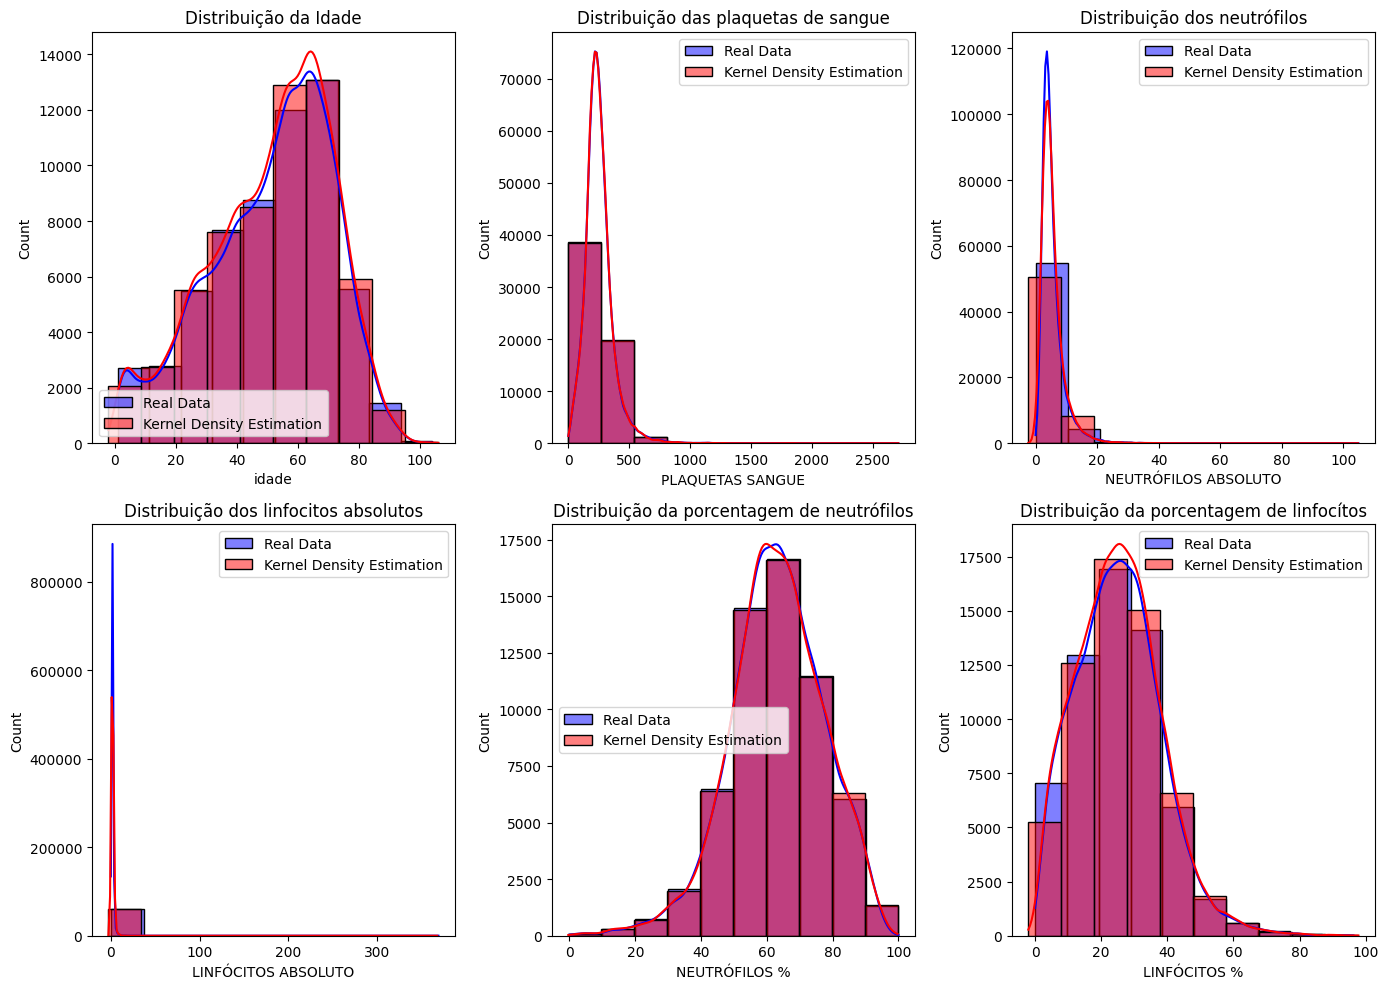

In [27]:
plot_data_distribution(Dados_df, synthetic_numerical_df, 'Real Data', 'Kernel Density Estimation')

In [28]:
def filter_synthetic_data(Dados_df, synthetic_numerical_df):
    """
    Filters the synthetic_numerical_df dataframe by removing rows where any column values are outside the
    min-max range of the corresponding columns in Dados_df.

    Parameters:
    Dados_df (pd.DataFrame): Original dataframe with minimum and maximum value reference.
    synthetic_numerical_df (pd.DataFrame): Synthetic dataframe to be filtered.

    Returns:
    pd.DataFrame: Filtered synthetic dataframe.
    """
    # Initialize the filtered synthetic dataframe as a copy of the original synthetic dataframe
    filtered_synthetic_df = synthetic_numerical_df.copy()

    # Iterate over each column in Dados_df that needs to be checked
    for column in Dados_df.columns:
        # Skip columns 'sexo_F' and 'sexo_M' as they are binary and don't need range checking
        if column in ['sexo_F', 'sexo_M']:
            continue

        # Calculate min and max of the column in Dados_df
        min_value = Dados_df[column].min()
        max_value = Dados_df[column].max()

        # Filter the synthetic dataframe based on the min and max value
        filtered_synthetic_df = filtered_synthetic_df[
            (filtered_synthetic_df[column] >= min_value) & (filtered_synthetic_df[column] <= max_value)
        ]

    return filtered_synthetic_df

In [29]:
synthetic_numerical_df = filter_synthetic_data(Dados_df, synthetic_numerical_df)

A continuação se apresentam algumas estatísticas descriptivas para poder visualizar que os dados gerados possuem as mesmas características estatísticas que os dados originais.

In [30]:
Dados_df.describe()

,idade,PLAQUETAS SANGUE,NEUTRÓFILOS ABSOLUTO,LINFÓCITOS ABSOLUTO,NEUTRÓFILOS %,LINFÓCITOS %
count,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000
mean,51.265135,251.517855,5.434319,1.936740,63.085056,25.334166
std,20.152421,116.906559,3.902032,3.221414,14.313352,12.903536
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,182.000000,3.143825,1.147750,54.200000,16.000000
50%,55.000000,237.000000,4.449300,1.730400,63.200000,24.900000
75%,66.000000,301.000000,6.511950,2.367975,72.900000,33.500000
max,104.000000,2708.000000,104.919000,369.244800,100.000000,96.300000


In [31]:
synthetic_numerical_df.describe()

,idade,PLAQUETAS SANGUE,NEUTRÓFILOS ABSOLUTO,LINFÓCITOS ABSOLUTO,NEUTRÓFILOS %,LINFÓCITOS %
count,53831.000000,53831.000000,53831.000000,53831.000000,53831.000000,53831.000000
mean,51.311698,250.637705,5.479013,2.182387,63.098014,25.365283
std,20.115214,114.400756,3.971684,3.414491,14.366770,12.890039
min,1.000000,1.162046,0.001100,0.000081,0.268045,0.000575
25%,38.000000,182.119532,3.088867,1.139715,54.251147,15.932066
50%,55.000000,236.961653,4.598446,1.925902,63.195139,24.888823
75%,66.000000,301.226584,6.745454,2.833265,72.866772,33.486398
max,104.000000,2626.099745,104.809167,367.951949,99.733207,95.807154


## 4. Conclusão e possíveis melhoras no modelo

Baseado nos resultados obtidos, os dados gerados usando kernel density estimation apresenta melhor resultado do que o modelo usando uma distribuição gaussiana multivariada. Porem, o modelo gaussiano multivariavel pode ser usado como um modelo baseline competitivo, e que pode ser ajustado de forma simples.

A gente tentou treinar uma GAN mas tivemos problemas em ajustar a GAN por isso ela consiguiu capturar parcialmente algumas caracteristicas dos dados tabulares porem teve o pior desempenho dos métodos avaliados neste estudo

#Referencias

[1] McLachlan, Scott. "Realism in synthetic data generation." Palmerston North, New Zealand: Massey University (2017).


[2] Walonoski, Jason, Mark Kramer, Joseph Nichols, Andre Quina, Chris Moesel, Dylan Hall, Carlton Duffett, Kudakwashe Dube, Thomas Gallagher, and Scott McLachlan. "Synthea: An approach, method, and software mechanism for generating synthetic patients and the synthetic electronic health care record." Journal of the American Medical Informatics Association 25, no. 3 (2018): 230-238.


[3] Fonseca, Joao, and Fernando Bacao. "Tabular and latent space synthetic data generation: a literature review." Journal of Big Data 10, no. 1 (2023): 115.